In [17]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
data= pd.read_csv('./data_files/NBA_Dataset.csv')

In [3]:
data

,Unnamed: 0,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,...,usg_pct,ows,dws,ws,ws_per_48,obpm,dbpm,bpm,vorp,award_share
0,0,1982,Kareem Abdul-Jabbar*,C,34,LAL,76,76.0,35.2,9.9,...,25.6,6.9,3.9,10.7,0.192,3.8,1.2,5.0,4.7,0.0
1,1,1982,Alvan Adams,C,27,PHO,79,75.0,30.3,6.4,...,22.8,2.5,4.7,7.2,0.144,1.4,2.2,3.6,3.4,0.0
2,2,1982,Mark Aguirre,SF,22,DAL,51,20.0,28.8,7.5,...,29.8,1.0,0.8,1.9,0.061,2.3,-1.6,0.7,1.0,0.0
3,3,1982,Danny Ainge,SG,22,BOS,53,1.0,10.6,1.5,...,21.5,-0.3,0.8,0.5,0.042,-3.7,1.0,-2.7,-0.1,0.0
4,4,1982,Tiny Archibald*,PG,33,BOS,68,51.0,31.9,4.5,...,17.9,3.4,1.8,5.2,0.115,1.4,-1.3,0.1,1.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17692,17692,2022,Thaddeus Young,PF,33,TOT,52,1.0,16.3,2.7,...,17.4,0.9,1.3,2.2,0.126,0.1,2.1,2.2,0.9,0.0
17693,17693,2022,Trae Young,PG,23,ATL,76,76.0,34.9,9.4,...,34.4,9.0,1.0,10.0,0.181,7.1,-2.0,5.2,4.8,0.0
17694,17694,2022,Omer Yurtseven,C,23,MIA,56,12.0,12.6,2.3,...,19.9,0.8,1.4,2.1,0.145,-1.4,0.4,-1.0,0.2,0.0
17695,17695,2022,Cody Zeller,C,29,POR,27,0.0,13.1,1.9,...,15.9,0.9,0.2,1.1,0.143,-1.2,-1.0,-2.2,0.0,0.0


In [4]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [13]:
position_age = data.groupby('pos')['age'].mean().reset_index()

c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


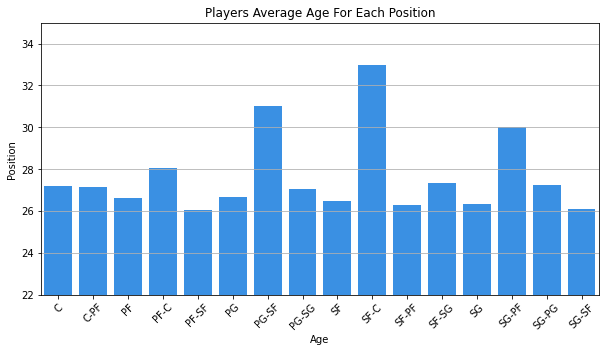

In [28]:
fig = plt.figure(figsize=(10,5))

sns.barplot(position_age['pos'], position_age['age'], color='dodgerblue')

plt.title("Players Average Age For Each Position")

plt.xlabel('Age')
plt.ylabel('Position')

plt.ylim(22,35)

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [30]:
data.columns

Index(['season', 'player', 'pos', 'age', 'team_id', 'g', 'gs', 'mp_per_g',
       'fg_per_g', 'fga_per_g', 'fg_pct', 'fg3_per_g', 'fg3a_per_g', 'fg3_pct',
       'fg2_per_g', 'fg2a_per_g', 'fg2_pct', 'efg_pct', 'ft_per_g',
       'fta_per_g', 'ft_pct', 'orb_per_g', 'drb_per_g', 'trb_per_g',
       'ast_per_g', 'stl_per_g', 'blk_per_g', 'tov_per_g', 'pf_per_g',
       'pts_per_g', 'mp', 'per', 'ts_pct', 'fg3a_per_fga_pct',
       'fta_per_fga_pct', 'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct',
       'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'ows', 'dws', 'ws',
       'ws_per_48', 'obpm', 'dbpm', 'bpm', 'vorp', 'award_share'],
      dtype='object')

In [34]:
team_fg_pct  = data.groupby('team_id')['fg_pct'].mean().reset_index()

c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


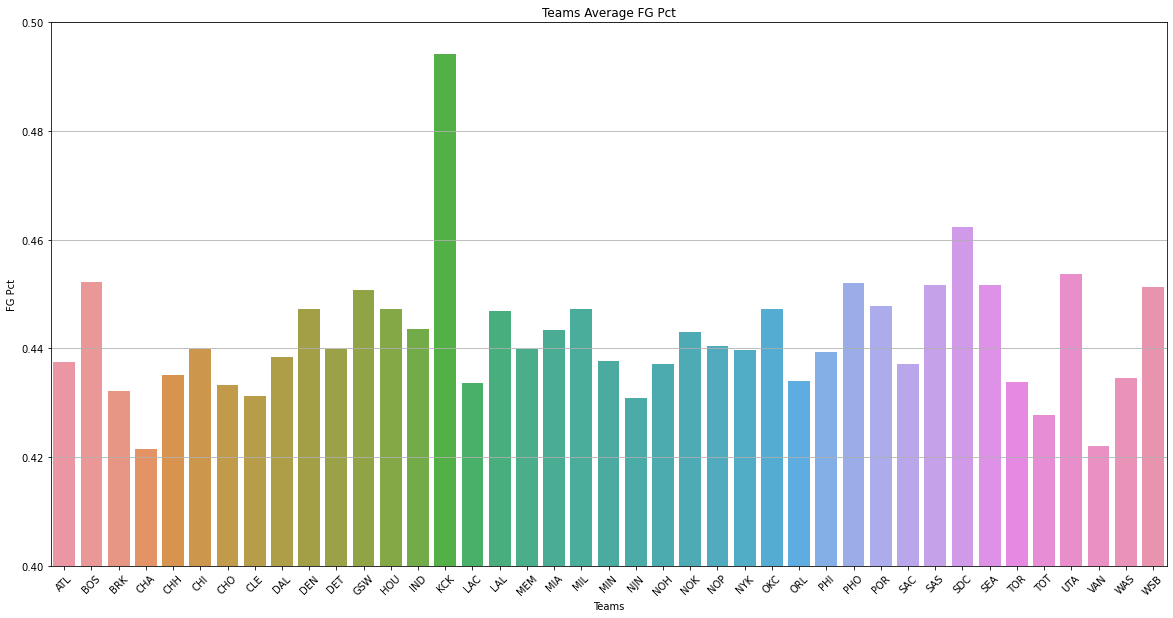

In [41]:
fig = plt.figure(figsize=(20,10))

sns.barplot(team_fg_pct['team_id'], team_fg_pct['fg_pct'])

plt.title("Teams Average FG Pct")

plt.xlabel('Teams')
plt.ylabel('FG Pct')

plt.ylim(.4, .5)


plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()